In [69]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.4.0 installed at /Users/richardqiu/opt/miniconda3/envs/physics212/lib/python3.9/site-packages/camb


In [86]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
# pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.set_cosmology(ombh2=0.022068, omch2=0.12029, cosmomc_theta=1.04122/100, tau=0.0925, omk=0,)
pars.InitPower.set_params(As=np.exp(3.098)/1e10, ns=0.9624, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=1)
print()

In [87]:
np.exp(3.098)/1e10

2.2153599745198838e-09

In [77]:
#calculate results for these parameters
%timeit results = camb.get_results(pars)

607 ms ± 47.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [88]:
results = camb.get_results(pars)

In [89]:
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK', raw_cl=False)
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 7.15 µs
(2551, 4)


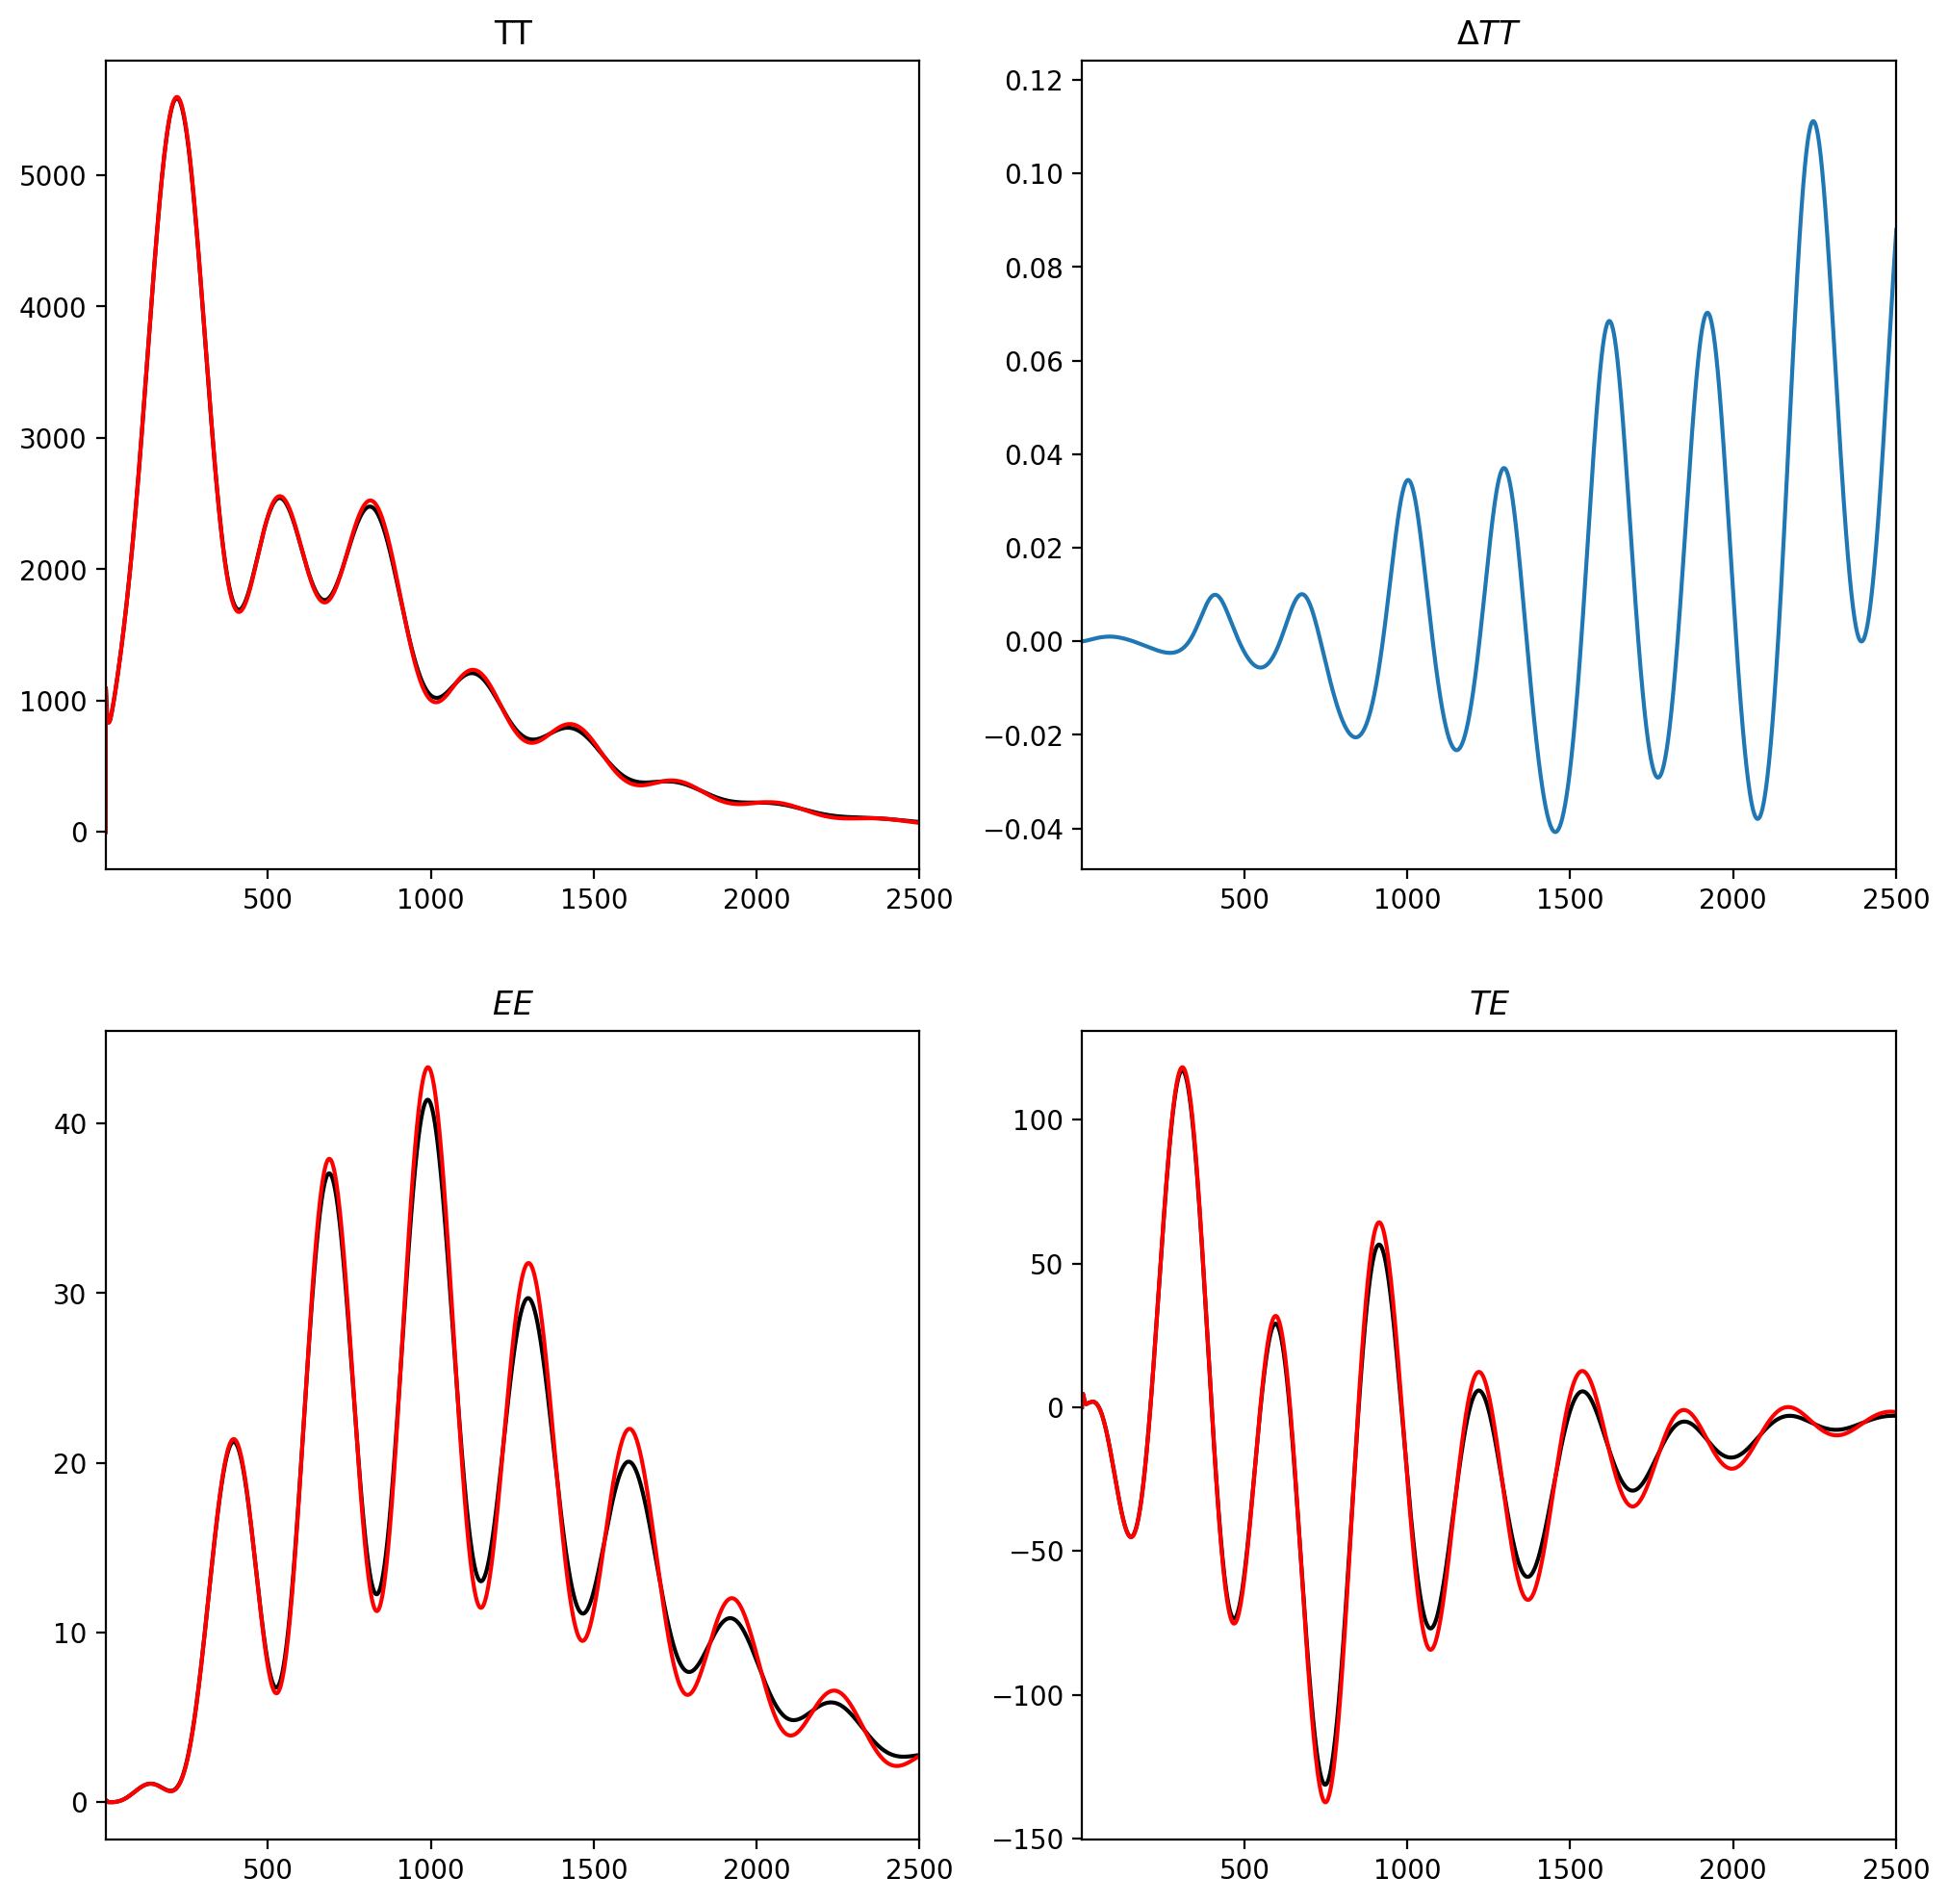

In [90]:
%time
#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(2,2, figsize = (12,12))
ax[0,0].plot(ls,totCL[:,0], color='k')
ax[0,0].plot(ls,unlensedCL[:,0], color='r')
ax[0,0].set_title('TT')
ax[0,1].plot(ls[2:], 1-unlensedCL[2:,0]/totCL[2:,0]);
ax[0,1].set_title(r'$\Delta TT$')
ax[1,0].plot(ls,totCL[:,1], color='k')
ax[1,0].plot(ls,unlensedCL[:,1], color='r')
ax[1,0].set_title(r'$EE$')
ax[1,1].plot(ls,totCL[:,3], color='k')
ax[1,1].plot(ls,unlensedCL[:,3], color='r')
ax[1,1].set_title(r'$TE$');
for ax in ax.reshape(-1): ax.set_xlim([2,2500]);

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 3.1 µs
(2601, 4)


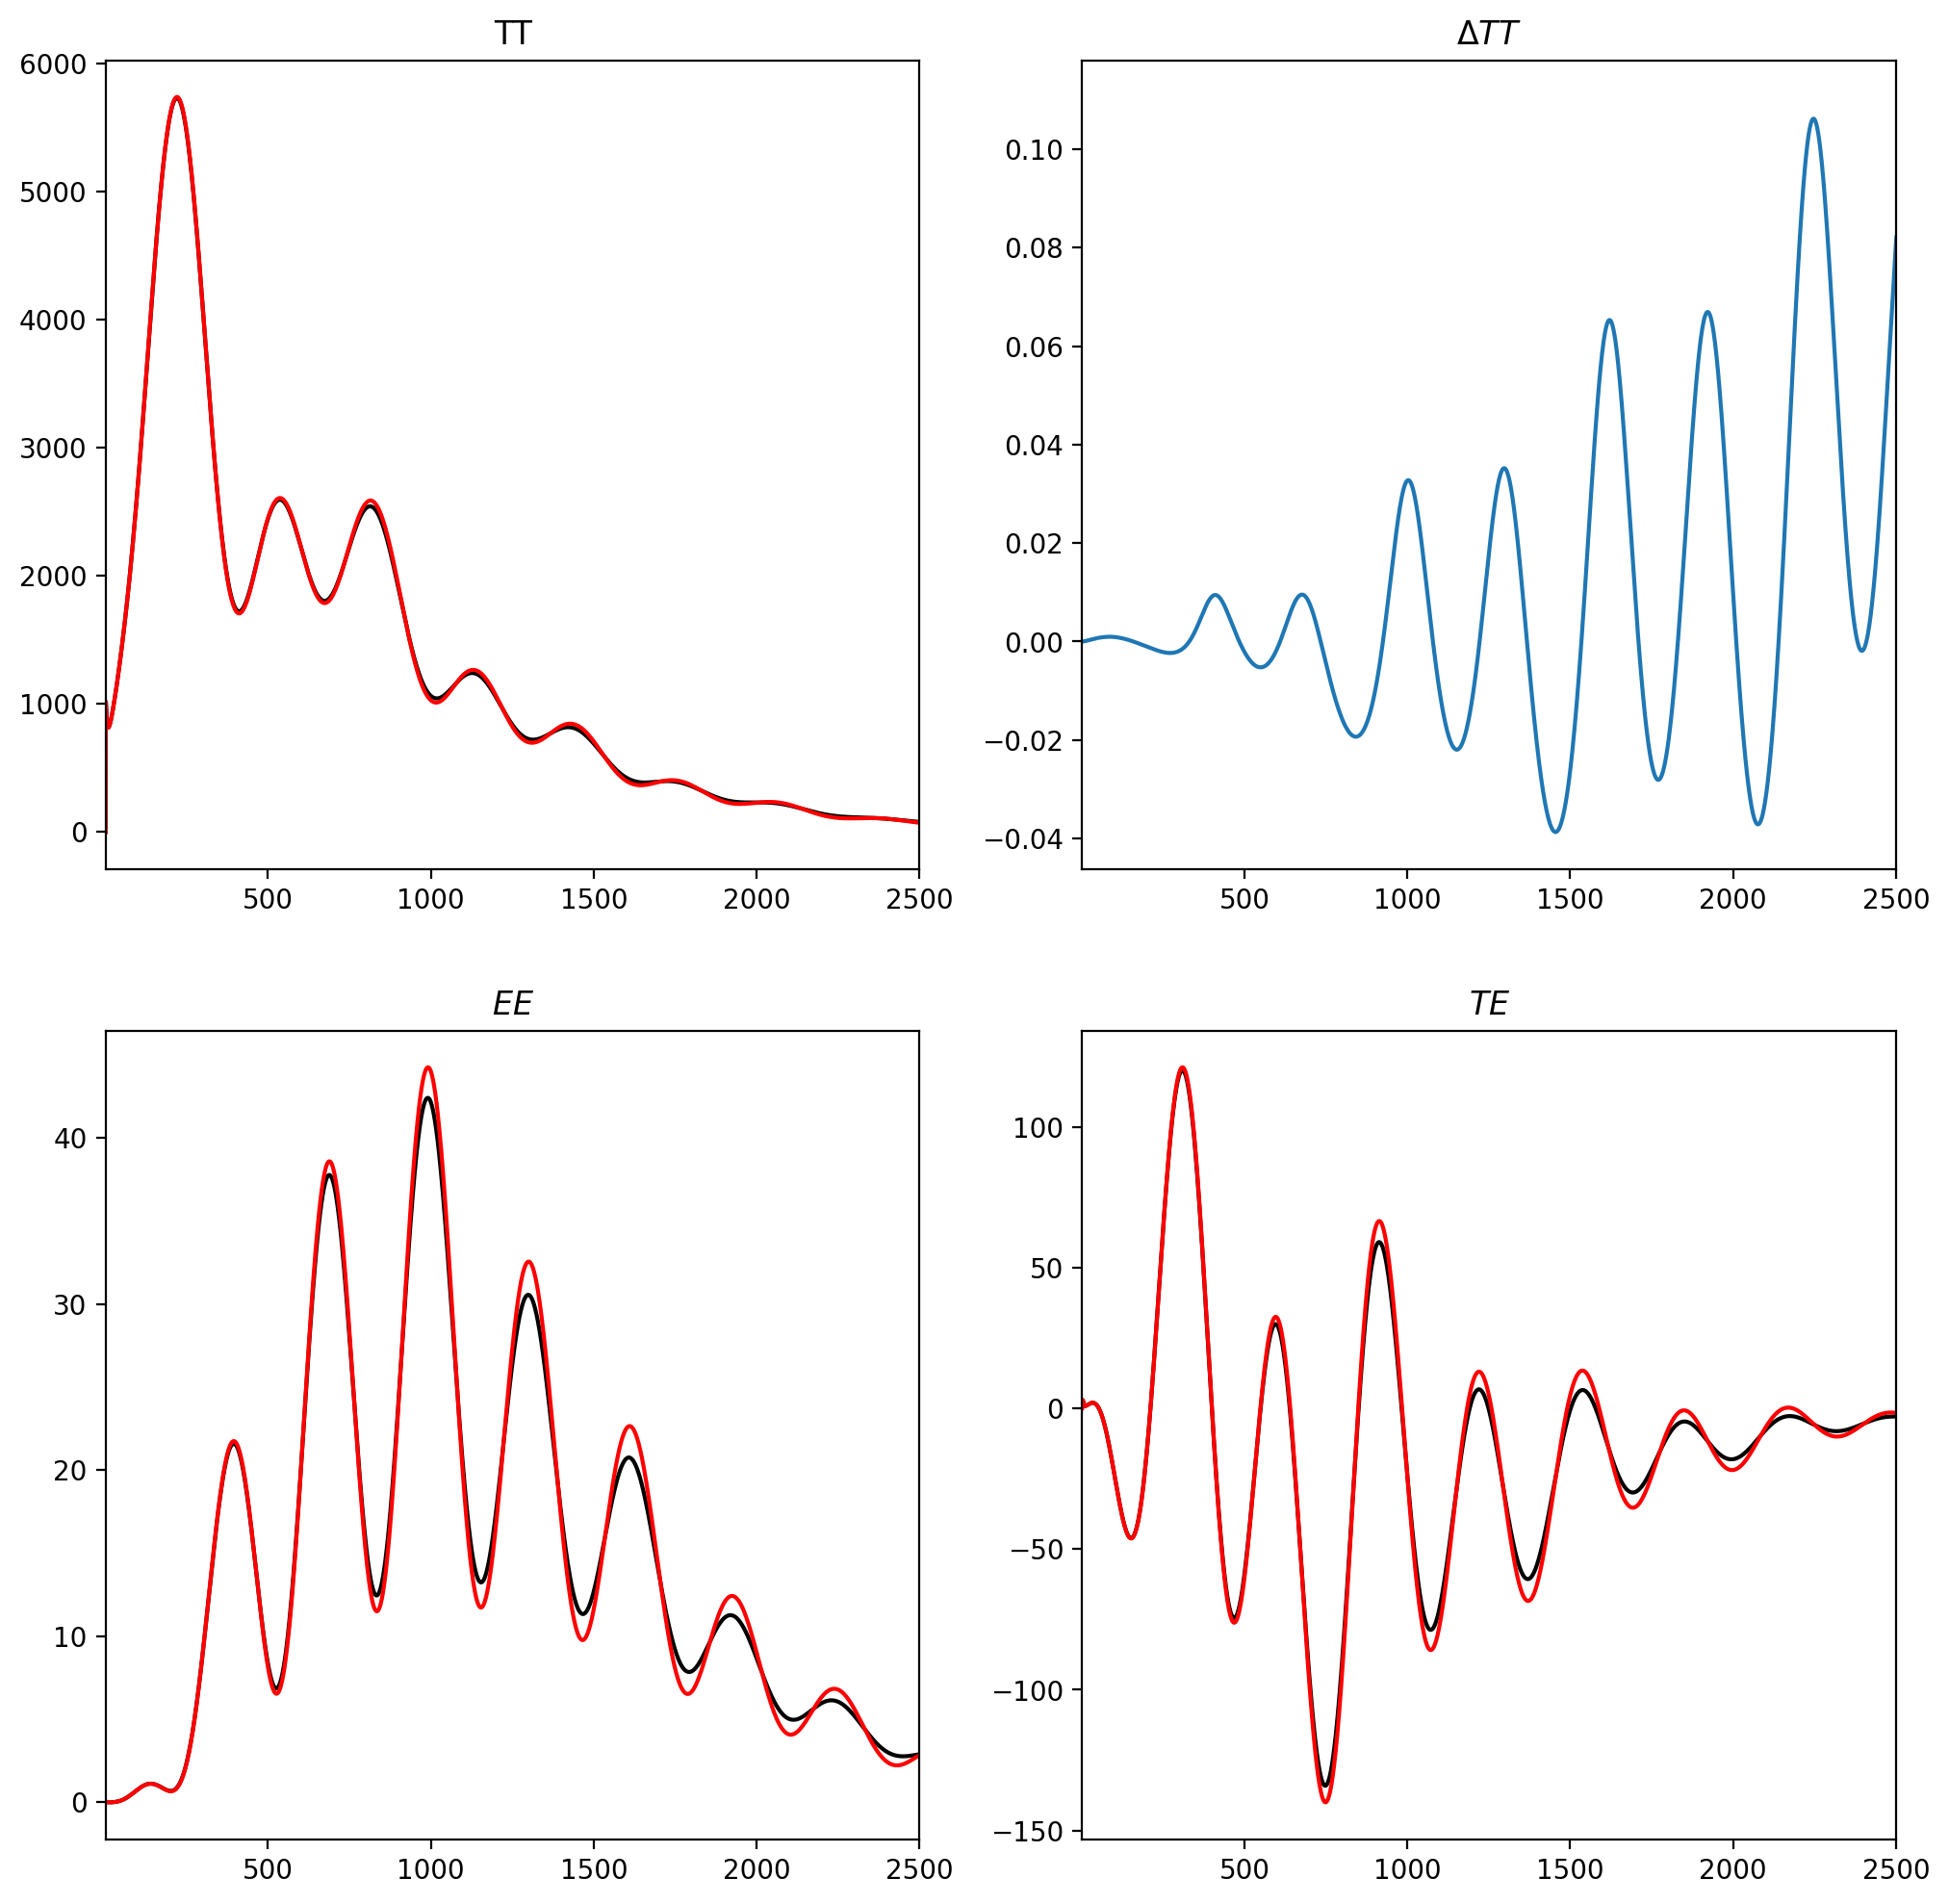

In [80]:
%time
#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(2,2, figsize = (12,12))
ax[0,0].plot(ls,totCL[:,0], color='k')
ax[0,0].plot(ls,unlensedCL[:,0], color='r')
ax[0,0].set_title('TT')
ax[0,1].plot(ls[2:], 1-unlensedCL[2:,0]/totCL[2:,0]);
ax[0,1].set_title(r'$\Delta TT$')
ax[1,0].plot(ls,totCL[:,1], color='k')
ax[1,0].plot(ls,unlensedCL[:,1], color='r')
ax[1,0].set_title(r'$EE$')
ax[1,1].plot(ls,totCL[:,3], color='k')
ax[1,1].plot(ls,unlensedCL[:,3], color='r')
ax[1,1].set_title(r'$TE$');
for ax in ax.reshape(-1): ax.set_xlim([2,2500]);

In [12]:
print(totCL[:,0])
print(totCL[:,0].shape)

[  0.           0.         971.2563926  ...  62.97720173  62.8610469
  62.74635933]
(2551,)


In [26]:
2508 - 31

2477

In [85]:
import clik

CMBlkl = clik.clik("baseline/plc_3.0/hi_l/plik/plik_rd12_HM_v22_TT.clik")
# CMBlkl = clik.clik("baseline/plc_3.0/hi_l/plik_lite/plik_lite_v22_TT.clik")
print(CMBlkl.get_lmax())
lmax = CMBlkl.get_lmax()[0]
CMBlkl(totCL[:2529,0])

(2508, -1, -1, -1, -1, -1)


array([-4.31675023e+31])

In [52]:
import clik

CMBlkl = clik.clik("baseline/plc_3.0/hi_l/plik/plik_rd12_HM_v22_TT.clik")
# CMBlkl = clik.clik("baseline/plc_3.0/hi_l/plik_lite/plik_lite_v22_TT.clik")
print(CMBlkl.get_lmax())
lmax = CMBlkl.get_lmax()[0]
CMBlkl(totCL[:2529,0])[0]

(2508, -1, -1, -1, -1, -1)


-2451796592.414662

In [50]:
np.exp(2.83563119e+09 - 2.45179659e+09)

<ipython-input-50-8ba961d60724>:1: RuntimeWarning: overflow encountered in exp
  np.exp(2.83563119e+09 - 2.45179659e+09)


inf

In [33]:
!ls baseline/plc_3.0/hi_l/plik_lite/plik_lite_v22_TT.clik

_mdb clik


In [76]:
# parameters can also be read from text .ini files, for example this sets up a best-fit 
# Planck 2018 LCDM cosmology (base_plikHM_TTTEEE_lowl_lowE_lensing). 
# [Use planck_2018_acc.ini if you need high-ell and/or accurate BB and CMB lensng spectra at beyond-Planck accuracy]
pars = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')
# for a local github installation you can just do 
# pars=camb.read_ini(os.path.join(camb_path,'inifiles','planck_2018.ini'))
print(pars)

class: <CAMBparams>
 WantCls = True
 WantTransfer = True
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_both
 Transfer: <TransferParams>
   high_precision = True
   accurate_massive_neutrinos = False
   kmax = 1.3464234
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2700
 max_l_tensor = 600
 max_eta_k = 18000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0223828
 omch2 = 0.1201075
 omk = 0.0
 omnuh2 = 0.0006451439
 H0 = 67.32117
 TCMB = 2.7255
 YHe = 0.2454006
 num_nu_massless = 2.046
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = True
 nu_mass_degeneracies = [0.0]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_indeptilt
   ns = 0.9660499
   nrun = 0.0
   nrunrun = 0.0
 